# Time Series Modeling

In [106]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn')

#한글 폰트 사용
import platform
from matplotlib import font_manager
 
if platform.system() == "Darwin":  #Mac
    plt.rc('font', family='AppleGothic')
else:
    font_path = 'C:/Windows/Fonts/malgun.ttf' # For Windows 
    font_name = font_manager.FontProperties(fname=font_path).get_name()  
    plt.rc('font', family=font_name)                           

plt.rcParams['axes.unicode_minus'] = False  #한글사용시 마이너스 사인 깨짐 방지

## Time series 분해

### Component Type

- 체계적 구성 요소 (systematic components)
    Level : series의 평균값.  
    Trend : 연속된 time point들 간의 value change. 기울기 존재.  
    Seasonality : 단기적 cycle을 반복하며 평균에서 벗어나는 것.  
    

- 비체계적 구성 요소 (non-systematic components)  
    Noise
    
    
- Additive model  

    - 𝑦(𝑡)=𝑙𝑒𝑣𝑒𝑙+𝑡𝑟𝑒𝑛𝑑+𝑠𝑒𝑎𝑠𝑜𝑛𝑎𝑙𝑖𝑡𝑦+𝑛𝑜𝑖𝑠𝑒 의 형태  
    - Linear model  
    - linear trend, linear seasonality  
    

- Multiplicative model  

    - 𝑦(𝑡)=𝑙𝑒𝑣𝑒𝑙∗𝑡𝑟𝑒𝑛𝑑∗𝑠𝑒𝑎𝑠𝑜𝑛𝑎𝑙𝑖𝑡𝑦∗𝑛𝑜𝑖𝑠𝑒 의 형태  
    - Non-linear model  
    - non-linear trend, non-linear seasonality

In [107]:
import pandas as pd
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose

2000-2011년 금 가격을 읽고 월별 가치로 다시 샘플링

In [108]:
gold_df = pd.read_csv("datasets/gold_prices.csv", index_col=0, parse_dates=True)
gold_df.head()

,Value
Date,
2000-01-31,284.31
2000-02-29,299.86
2000-03-31,286.39
2000-04-28,279.69
2000-04-30,279.69


In [109]:
gold_df.rename(columns={'Value': 'price'}, inplace=True)
df = gold_df.resample('M').last()

print(df.shape)
df.head()

(144, 1)


,price
Date,
2000-01-31,284.31
2000-02-29,299.86
2000-03-31,286.39
2000-04-30,279.69
2000-05-31,275.19


df 에 롤링 평균과 표준 편차를 추가하고 시각화

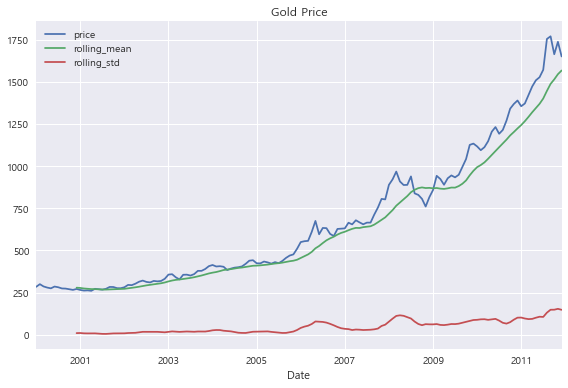

In [110]:
WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title='Gold Price')

plt.tight_layout()
plt.show()

## `multiplicative model`을 사용하여 seasonality 분해

- price가 multiplicative model type이라 가정하고 `multiplicative decomposition` 수행

- `seasonal_decompose()`의 결과를 plot하면 4개의 sub-plot 생성
    1. Observed - original price
    2. Trend
    3. Seasonality
    4. Residual

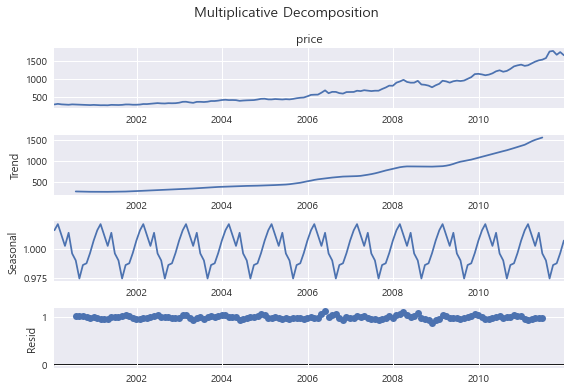

In [111]:
results = seasonal_decompose(df.price, model='multiplicative')

results.plot().suptitle('Multiplicative Decomposition', fontsize=14)

plt.tight_layout()
plt.show()

### `additive model`을 사용하여 seasonality 분해

- price가 multiplicative model type이라 가정하고 `additive decomposition` 수행

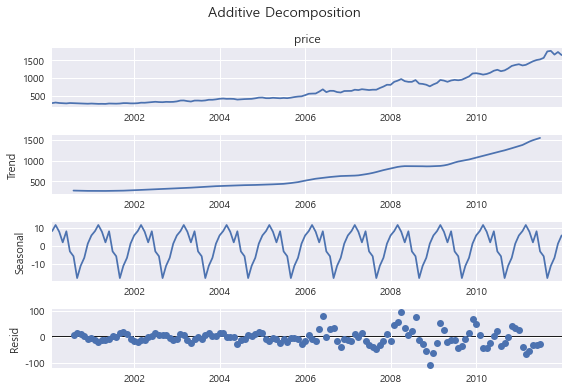

In [112]:
results = seasonal_decompose(df.price, model='additive')

results.plot().suptitle('Additive Decomposition', fontsize=14)

plt.tight_layout()
plt.show()

## Testing for stationarity in time series

In [113]:
import pandas as pd
import quandl
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [114]:
gold_df = pd.read_csv("datasets/gold_prices.csv", index_col=0, parse_dates=True)

gold_df.rename(columns={'Value': 'price'}, inplace=True)
df = gold_df.resample('M').last()
df.head()

,price
Date,
2000-01-31,284.31
2000-02-29,299.86
2000-03-31,286.39
2000-04-30,279.69
2000-05-31,275.19


### ADF test 도우미 함수 정의

In [116]:
def adf_check(ts):
    result = adfuller(ts)
    print('ADF Statistics: {:f}'.format(result[0]))
    print('p-value: {:f} - {}'.format(result[1], 'Non-stationary' if result[1] > 0.05 else 'Stationary'))
    print('Critical Values:')
    for k,v in result[4].items():
        print('\t{}: {:.3f}'.format(k, v))

In [118]:
adf_check(df.price)

ADF Statistics: 3.510499
p-value: 1.000000 - Non-stationary
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


**p-value 가 0.05 보다 크므로 non-stationary**